In [1]:
import numpy as np
from matplotlib import pyplot as plt

import AFG31000 as awg
awg_ip = "192.168.0.149"

from sigproc_kit import *

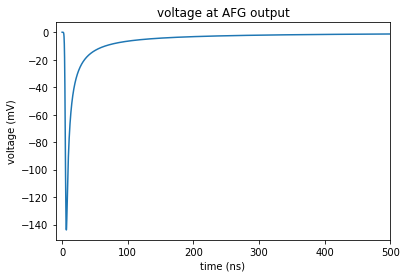

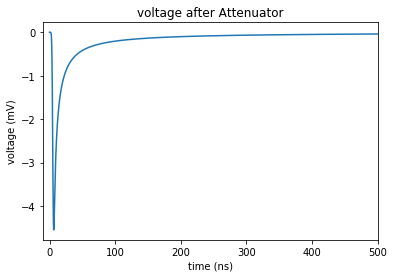

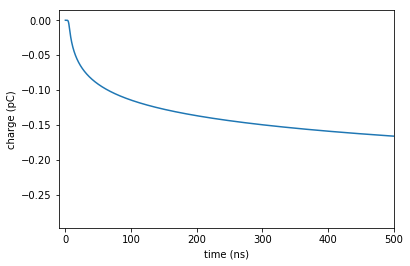

target ip : 192.168.0.149
connect to device ...
*IDN?
TEKTRONIX,AFG31252,C010446,SCPI:99.0 FV:1.6.1
success!
preparing data for channel 1
sending data ...
waveform length: 40000
sample length: 40000
close socket


In [47]:
##################################################
##               detector signal                ##
##################################################

def func_1_over_t(x, A,t0, delay):
    x_ = x - delay
    
    return (x_ > 0) * A * 1/(abs(x_+t0)+1e-12)

def ion_sig(x,A,t0,delay,sigma):
    time_vec = func_1_over_t(x, A,t0, delay)
    time_vec = fft_gauss_LPF(x,time_vec,sigma=sigma)
    return time_vec



period = 20e-6

x=np.arange(0,period,0.1e-9)

#def ion_sig(x,A,t0,delay,sigma):

A1pc = -100e-12 ## gives us circa 1pC

y=ion_sig(x,A1pc*.2,2.6e-9,5e-9,1e-9)

y_att = y

## i am using a 30 dB attenuator
y_att = y*10**(30/20)

plt.plot(x*1e9,y_att*1e3)
plt.xlabel("time (ns)")
plt.ylabel("voltage (mV)")
plt.title("voltage at AFG output")
plt.xlim(-10,500)
plt.show()

plt.plot(x*1e9,y*1e3)
plt.xlabel("time (ns)")
plt.ylabel("voltage (mV)")
plt.title("voltage after Attenuator")
plt.xlim(-10,500)
plt.show()


Rser = 330
Rin  = 300
R=Rser+Rin

plt.plot(x*1e9,integrate_dt(x,y)/R*1e12)
plt.xlabel("time (ns)")
plt.ylabel("charge (pC)")
plt.xlim(-10,500)
plt.show()

awg.send_data(x,y_att,
              trace=1,
              ip=awg_ip,
              period=period)
#awg.send_data(x,-y_att,
#              trace=3,
#              ip=awg_ip,
#              period=period)

In [3]:
##################################################
##               reference pulse                ##
##################################################

awg.pulser(
    trace=2,
    ip=awg_ip,
    on_val=500e-3,
    width=50e-9,
    leading_edge=2e-9,
    trailing_edge=2e-9,
    delay=0e-9,
    period=period
)

target ip : 192.168.0.149
connect to device ...
*IDN?
TEKTRONIX,AFG31252,C010446,SCPI:99.0 FV:1.6.1
success!
preparing data for channel 2
sending data ...
waveform length: 40000
sample length: 40000
close socket
